In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc, confusion_matrix, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso

from scipy import interp
from itertools import cycle

### Multi-layer Perceptron Regressor
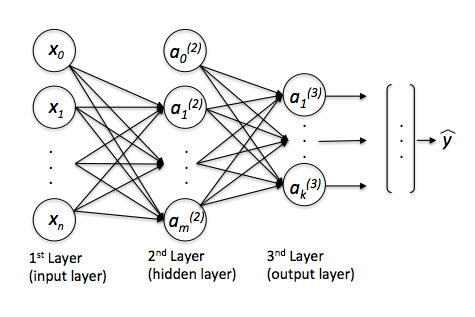

## Regression
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [2]:
Xs_r, y_r = datasets.make_regression(n_features=5,n_samples=1000,noise=0.6)
features_r = pd.DataFrame(Xs_r)
data_r = pd.concat([features_r,pd.DataFrame(y_r)],axis=1)
data_r.columns = ['A','B','C','D','E','Target']
X_train, X_test, y_train, y_test = train_test_split(features_r, y_r, test_size=0.25)

#### Parameters to Tune:

hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
The ith element represents the number of neurons in the ith hidden layer.

activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
Activation function for the hidden layer.

‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
The solver for weight optimization.

‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
‘sgd’ refers to stochastic gradient descent.
‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

alpha : float, optional, default 0.0001
L2 penalty (regularization term) parameter.

#### The Problem:
MLPs take a long time. It is not feasible to figure out what the absolute best combination of predictors in when, for example if you settle on a HL = (300,300,300), activation=relu, alpha=0.03, you would need to test literally hundreds of millions of examples. Instead, we can consider different ideas as it comes to the design of the perceptron layout.

For example, we may wish to experiment with a set of: (S,S,S), (L,M,S), (L,S,L), ... as a way to emulate the many different indivdual values that the hidden layers can take.

In [3]:
#Create and Tune the Model on the Test Data
mlp = MLPRegressor(verbose=True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 8630.94895305
Iteration 2, loss = 8621.54562969
Iteration 3, loss = 8612.19199718
Iteration 4, loss = 8602.84092851
Iteration 5, loss = 8593.54162461
Iteration 6, loss = 8583.73051235
Iteration 7, loss = 8573.86337398
Iteration 8, loss = 8563.62561167
Iteration 9, loss = 8553.13356396
Iteration 10, loss = 8542.39192786
Iteration 11, loss = 8531.16273807
Iteration 12, loss = 8519.34309380
Iteration 13, loss = 8507.29509261
Iteration 14, loss = 8494.16549784
Iteration 15, loss = 8480.56114204
Iteration 16, loss = 8466.63829145
Iteration 17, loss = 8451.42470354
Iteration 18, loss = 8435.80398392
Iteration 19, loss = 8419.61224075
Iteration 20, loss = 8402.23753916
Iteration 21, loss = 8383.61328297
Iteration 22, loss = 8365.01563261
Iteration 23, loss = 8344.86344047
Iteration 24, loss = 8323.66982272
Iteration 25, loss = 8302.13666701
Iteration 26, loss = 8279.38825854
Iteration 27, loss = 8255.18007194
Iteration 28, loss = 8231.08648694
Iteration 29, loss = 8204.850

/Users/Nicole/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [4]:
#Test the Model
print(mlp.score(X_test,y_test))

0.9441713784045892


### Exercise
Now try to create an MLP Regressor with the given dataset but now add parameters to the model. Include an activation function, a solver, 3 hidden layers with your choice of how many perceptrons per layer, verbose = True, random_state = 0, and max_iterations (max_iter) between 500 and 1500. And then print out the mlp score.

### Multi-layer Perceptron Classifier
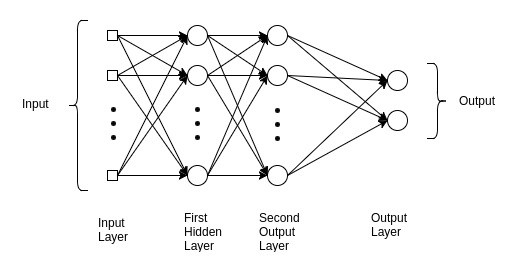

## Classification
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [5]:
Xs,y = datasets.make_classification(n_features=15,n_samples=5000,n_classes=4,n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

Parameter Tuning will remain the same as it comes to values.

In [6]:
#Create and Tune the Model on the Test Data
mlp = MLPClassifier(verbose=True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.22253805
Iteration 2, loss = 0.92075347
Iteration 3, loss = 0.73109577
Iteration 4, loss = 0.60216558
Iteration 5, loss = 0.51133588
Iteration 6, loss = 0.44743567
Iteration 7, loss = 0.40251152
Iteration 8, loss = 0.37094134
Iteration 9, loss = 0.34830672
Iteration 10, loss = 0.33139059
Iteration 11, loss = 0.31845546
Iteration 12, loss = 0.30870160
Iteration 13, loss = 0.30104154
Iteration 14, loss = 0.29448357
Iteration 15, loss = 0.28941131
Iteration 16, loss = 0.28516124
Iteration 17, loss = 0.28134659
Iteration 18, loss = 0.27816398
Iteration 19, loss = 0.27522360
Iteration 20, loss = 0.27246251
Iteration 21, loss = 0.26995493
Iteration 22, loss = 0.26807994
Iteration 23, loss = 0.26623907
Iteration 24, loss = 0.26424614
Iteration 25, loss = 0.26271451
Iteration 26, loss = 0.26125370
Iteration 27, loss = 0.25990129
Iteration 28, loss = 0.25830540
Iteration 29, loss = 0.25683739
Iteration 30, loss = 0.25586797
Iteration 31, loss = 0.25480651
Iteration 32, los

/Users/Nicole/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [7]:
#Test the Model
print(mlp.score(X_test, y_test))

0.899


## Evaluating Success for Classification
ROC Curves

In [8]:
#Binarize
target_b = label_binarize(y, classes=[0,1,2,3])
n_classes = target_b.shape[1]

#Split
X_train, X_test, y_train, y_test = train_test_split(Xs, target_b, test_size=0.25)
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

#Score
y_scores = mlp.predict_proba(X_test)

# Compute ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_scores[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

/Users/Nicole/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


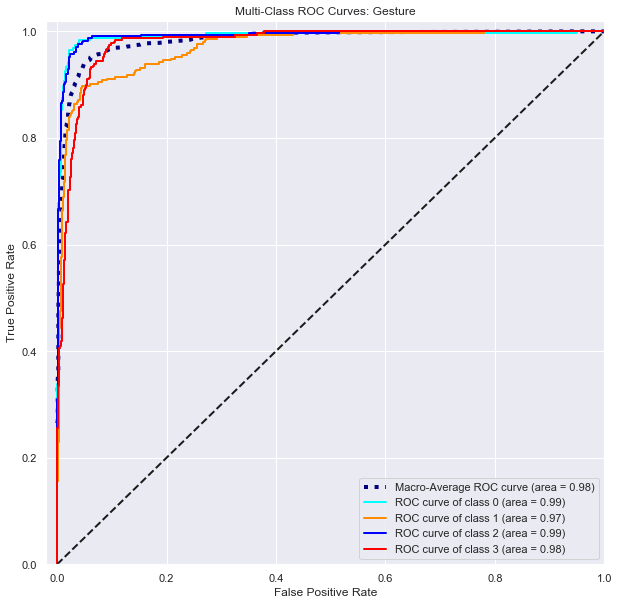

In [9]:
# Aggregate False Positive Rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate Curves
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'blue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves: Gesture')
plt.legend(loc="lower right")

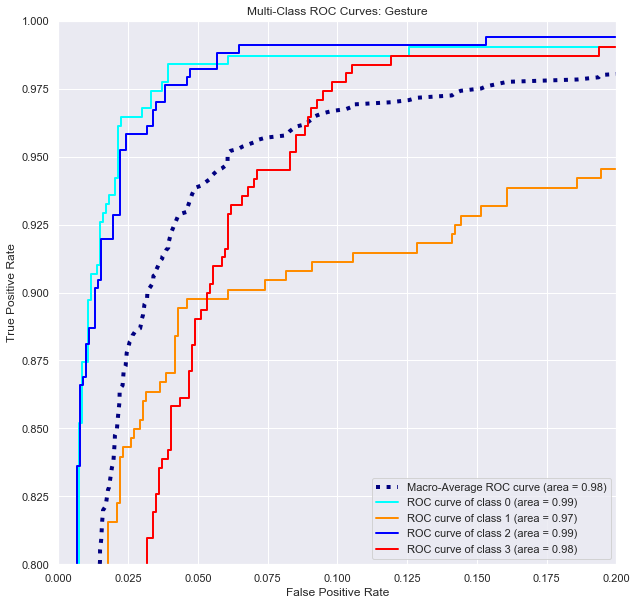

In [10]:
# Plot all ROC curves
plt.figure(figsize=(10,10))

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'blue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([ 0, .2])
plt.ylim([0.8, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves: Gesture')
plt.legend(loc="lower right")

Confusion Matrices

/Users/Nicole/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[Text(30.5,0.5,'Actual Class'),
 Text(0.5,30.5,'Predicted Class'),
 Text(0.5,1,'Confusion Matrix')]

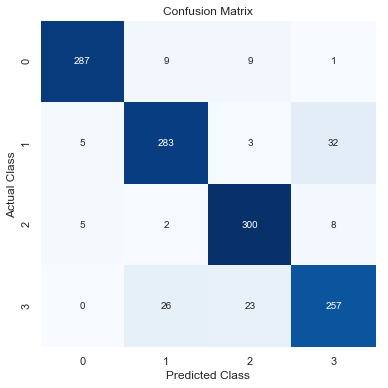

In [11]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25)
mlp.fit(X_train,np.ravel(y_train))

test_cf = pd.DataFrame(confusion_matrix(y_test,mlp.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

[Text(30.5,0.5,'Actual Class'),
 Text(0.5,30.5,'Predicted Class'),
 Text(0.5,1,'Normalized Confusion Matrix')]

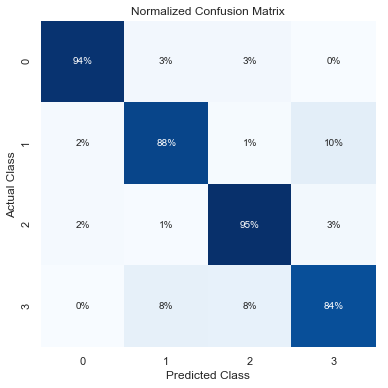

In [12]:
test_cf = confusion_matrix(y_test,mlp.predict(X_test))
test_cf = test_cf.astype('float') / test_cf.sum(axis=1)[:, np.newaxis]
test_cf = pd.DataFrame((test_cf))
                           
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,cmap='Blues',cbar=False,fmt='.0%')
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Normalized Confusion Matrix')

### Exercise
Now try to create an MLP Classifier with the given dataset but now add parameters to the model. Include an activation function, a solver, 3 hidden layers with your choice of how many perceptrons per layer, and verbose = True. And then print out the mlp score. Finally output a confusion matrix and a confusion matrix.

### Extra Exercise
Now try to create an MLP Classifier with the given dataset using a cross-validation score. So instead of mlp.fit(), try:

scores = cross_val_score("model name",X="columns",y=np.ravel("target_column"),scoring='accuracy',cv="# of cross validations you want")

print(round(sum(scores)*100/len(scores),2),'% Accuracy on Average')

print('Of Scores:',scores)